In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout
from tensorflow.keras.layers import Flatten, GlobalMaxPooling2D, MaxPooling2D

In [2]:
# We should make (y_train, y_test) to 1D from 2D
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
y_train.shape

(50000,)

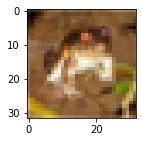

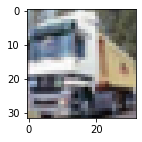

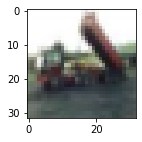

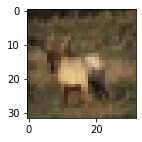

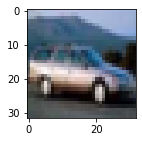

In [3]:
# A quick review
for n in range(0,5):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[n])

In [9]:
# BatchNormalization is important for hyperparameter optimization 
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [10]:
# number of classes
K = len(set(y_train)) # We added "set()" because we want uniqe values
print("number of classes:", K)
print(X_train.shape)

number of classes: 10
(50000, 32, 32, 3)


In [12]:
# Build the model using the functional API
i = Input(shape=X_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [16]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Fit
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 178s 112ms/step - loss: 1.3070 - accuracy: 0.5468 - val_loss: 1.0592 - val_accuracy: 0.6333
Epoch 2/20
1563/1563 [==============================] - 151s 97ms/step - loss: 0.8551 - accuracy: 0.7042 - val_loss: 0.8367 - val_accuracy: 0.7144
Epoch 3/20
1563/1563 [==============================] - 156s 100ms/step - loss: 0.6893 - accuracy: 0.7631 - val_loss: 0.7340 - val_accuracy: 0.7457
Epoch 4/20
1563/1563 [==============================] - 152s 97ms/step - loss: 0.5799 - accuracy: 0.8004 - val_loss: 0.6945 - val_accuracy: 0.7695
Epoch 5/20
1563/1563 [==============================] - 153s 98ms/step - loss: 0.4928 - accuracy: 0.8314 - val_loss: 0.6308 - val_accuracy: 0.7962
Epoch 6/20
1563/1563 [==============================] - 157s 100ms/step - loss: 0.4240 - accuracy: 0.8543 - val_loss: 0.7135 - val_accuracy: 0.7769
Epoch 7/20
1563/1563 [==============================] - 158s 101ms/step - loss: 0.3564 - accuracy: 0.8778 - val_los

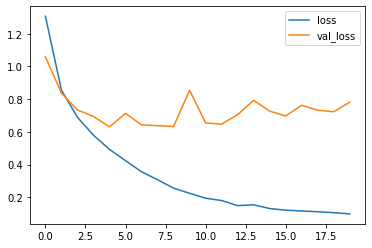

In [17]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

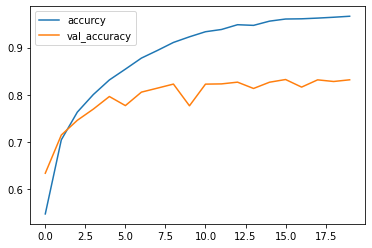

In [18]:
plt.plot(r.history["accuracy"], label="accurcy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()

[[840  14  21  14  10   4   1   8  50  38]
 [  4 901   1   1   1   0   3   2  17  70]
 [ 43   3 743  42  38  60  30  21   9  11]
 [ 10   4  40 670  43 131  32  32  15  23]
 [ 12   1  45  58 776  31  19  43   8   7]
 [  7   4  20  93  32 784   9  35   3  13]
 [  4   3  34  41  20  24 856   7   6   5]
 [  9   3  11  16  25  30   3 886   2  15]
 [ 25  10   3   1   2   0   3   2 924  30]
 [  5  31   4   5   0   0   2   5  11 937]]


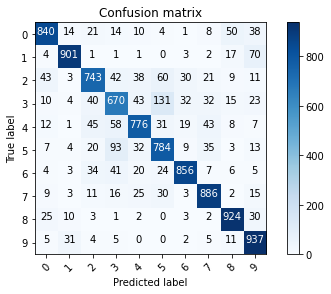

In [19]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [20]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

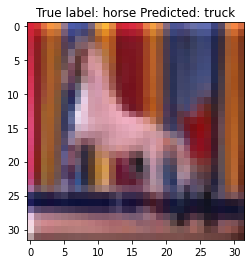

In [22]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [24]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.7818540334701538
Test accuracy: 0.8317000269889832
